In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.metrics import  accuracy_score

/Users/yanshuo/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


(1797, 64)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
0


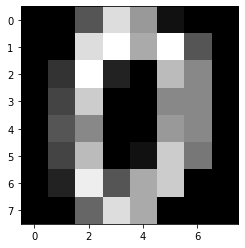

In [4]:
digits = load_digits()
data = digits.data
print(data.shape)
print(digits.images[0])
print(digits.target[0])
plt.gray()
plt.imshow(digits.images[0])
plt.show()


In [11]:
data= digits.data
target = digits.target
data1 = np.vstack((data, data, data))
target1 = np.hstack((target, target, target))
train_x,test_x,train_y,test_y = train_test_split(data1,target1,test_size=0.25)
ss = StandardScaler()
train_ss_scaled = ss.fit_transform(train_x)
test_ss_scaled = ss.transform(test_x)

mm = MinMaxScaler()
train_mm_scaled = mm.fit_transform(train_x)
test_mm_scaled = mm.transform(test_x)

In [12]:
models = {}
models['knn']= KNeighborsClassifier()
models['svm']=SVC()
models['bayes']=MultinomialNB()
models['tree']=DecisionTreeClassifier()
models['ada']=AdaBoostClassifier(base_estimator=models['tree'],learning_rate=0.1)
for model_key in models.keys():
    if model_key == 'knn' or model_key=='svm' or model_key =='ada':
        model = models[model_key]
        model.fit(train_ss_scaled,train_y)
        predict = model.predict(test_ss_scaled)
        print(model_key,accuracy_score(test_y,predict))
    else:
        model = models[model_key]
        model.fit(train_mm_scaled,train_y)
        predict = model.predict(test_mm_scaled)
        print(model_key,accuracy_score(test_y,predict))

knn 0.9814540059347181
svm 1.0
bayes 0.9050445103857567
tree 0.9933234421364985
ada 0.9933234421364985
